In [ ]:
%pip install opendatasets
import opendatasets as od
import numpy as np
import pandas as pd

In [6]:
od.download("https://www.kaggle.com/datasets/anshtanwar/current-daily-price-of-various-commodities-india")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: narasimha17
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/anshtanwar/current-daily-price-of-various-commodities-india


100%|██████████| 249k/249k [00:00<00:00, 276MB/s]

In [7]:
df=pd.read_csv("/content/current-daily-price-of-various-commodities-india/Price_Agriculture_commodities_Week.csv")

In [15]:
df.head(5)

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0


In [9]:
df.shape

(23093, 10)

In [11]:
df.describe()

,Min Price,Max Price,Modal Price
count,23093.000000,23093.000000,23093.000000
mean,4187.077045,4976.034260,4602.917742
std,5472.783385,6277.308057,5843.822711
min,0.000000,0.000000,0.830000
25%,1750.000000,2000.000000,1955.000000
50%,2725.000000,3400.000000,3000.000000
75%,5000.000000,6000.000000,5500.000000
max,223500.000000,227500.000000,225500.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         23093 non-null  object 
 1   District      23093 non-null  object 
 2   Market        23093 non-null  object 
 3   Commodity     23093 non-null  object 
 4   Variety       23093 non-null  object 
 5   Grade         23093 non-null  object 
 6   Arrival_Date  23093 non-null  object 
 7   Min Price     23093 non-null  float64
 8   Max Price     23093 non-null  float64
 9   Modal Price   23093 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB


In [12]:
df.columns

Index(['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade',
       'Arrival_Date', 'Min Price', 'Max Price', 'Modal Price'],
      dtype='object')

In [21]:
df.isnull().sum()

,0
State,0
District,0
Market,0
Commodity,0
Variety,0
Grade,0
Arrival_Date,0
Min Price,0
Max Price,0
Modal Price,0


In [22]:
df[df.duplicated()]

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price


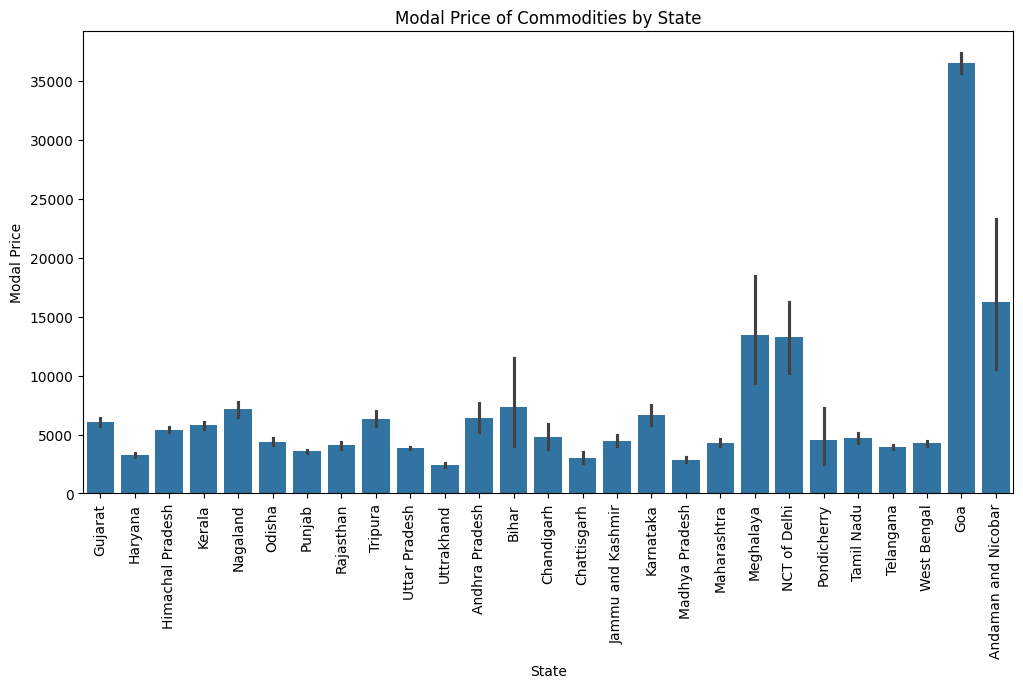

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Modal Price', data=df)
plt.xticks(rotation=90)
plt.title('Modal Price of Commodities by State')
plt.show()

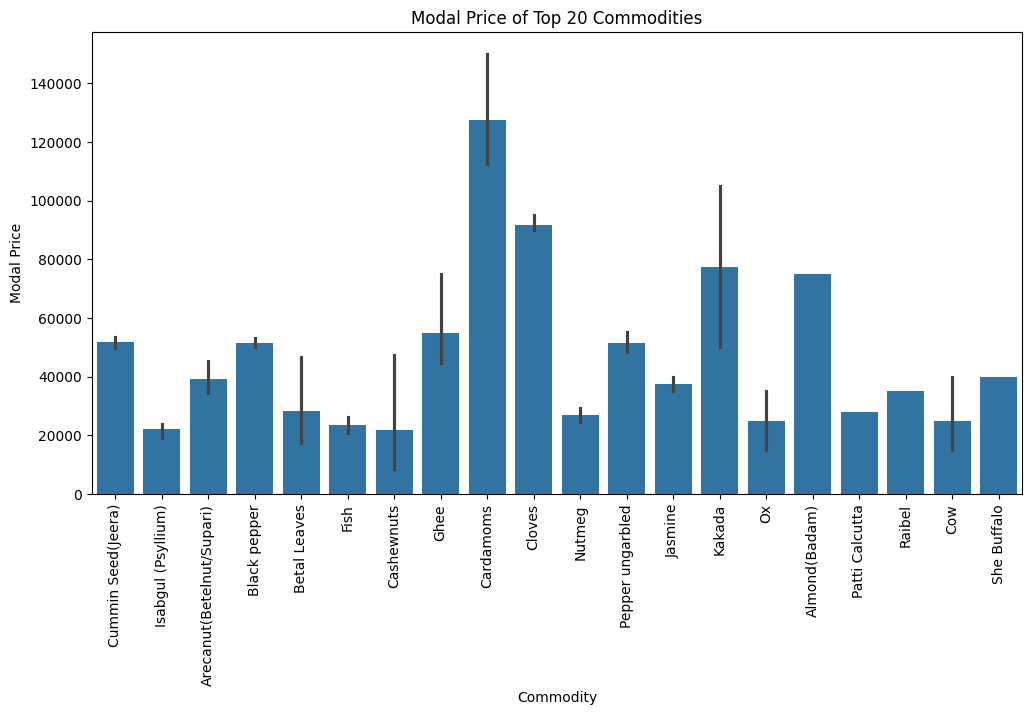

In [19]:
top_20_commodities = df.groupby('Commodity')['Modal Price'].mean().nlargest(20).index
df_top_20 = df[df['Commodity'].isin(top_20_commodities)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Commodity', y='Modal Price', data=df_top_20)
plt.xticks(rotation=90)
plt.title('Modal Price of Top 20 Commodities')
plt.show()

In [23]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [24]:
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0


In [27]:
df['State_encode']=LabelEncoder().fit_transform(df['State'])
df['District_encode']=LabelEncoder().fit_transform(df['District'])
df['Market_encode']=LabelEncoder().fit_transform(df['Market'])
df['Commodity_encode']=LabelEncoder().fit_transform(df['Commodity'])
df['Variety_encode']=LabelEncoder().fit_transform(df['Variety'])
df['Min_price_encode']=LabelEncoder().fit_transform(df['Min Price'])
df['Max_price_encode']=LabelEncoder().fit_transform(df['Max Price'])
df['Modal_encode']=LabelEncoder().fit_transform(df['Modal Price'])

In [28]:
df.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price,State_encode,District_encode,Market_encode,Commodity_encode,Variety_encode,Min_price_encode,Max_price_encode,Modal_encode
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0,6,12,309,22,57,748,822,823
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0,6,12,309,28,311,421,628,522
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0,6,12,309,32,81,480,628,600
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0,6,12,309,40,87,1215,1356,1369
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0,6,12,309,60,112,1349,1534,1563


In [29]:
df= df.dropna()
x = df[['State_encode','District_encode','Market_encode','Commodity_encode','Variety_encode']]
y = df['Modal Price']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 5217405.742510206
R-squared: 0.8311389388625945


In [34]:
print(r2_score(y_test, y_pred))

0.8311389388625945


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(x_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_dt))
print('R-squared:', r2_score(y_test, y_pred_dt))

Mean Squared Error: 7386808.800558082
R-squared: 0.760926323533113


In [36]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_xgb))
print('R-squared:', r2_score(y_test, y_pred_xgb))

Mean Squared Error: 4948189.84982527
R-squared: 0.8398520970023639


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(x_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))
print('R-squared:', r2_score(y_test, y_pred_lr))

Mean Squared Error: 30325852.1686714
R-squared: 0.018505397160430537


In [38]:
print(r2_score(y_test, y_pred))

0.8311389388625945


In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_xgb))
print('R-squared:', r2_score(y_test, y_pred_xgb))

Mean Squared Error: 4948189.84982527
R-squared: 0.8398520970023639
